# Data 612 Project 3 - Matrix Factorization
##### Team: Mia Chen & Wei Zhou
##### Date: 6/27/2020

Matrix factorization can be used to predict ratings in collaborative filtering recommender systems. In this project, we are going to use the Single Value Decomposition (SVD) method for to make movie recommendations based on two datasets from the [MovieLens](https://www.kaggle.com/jneupane12/movielens) dataset. 

* <b>movies.csv</b> : contains movies information
    - movieId
    - title
    - genres
 
* <b>ratings.csv</b> : contains movie ratings by users
    - userId
    - movieId
    - rating
    - timestamp

In [16]:
# Load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

## Data
##### There are 27,278 movies in the movies dataset.

In [8]:
# Take a look at movies dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
# Number of rows and columns
print(movies.shape)

(27278, 3)


##### There are over 1 million ratings from 7,120 users, with most ratings ranging from 3 to 4 (based on a scale from 1 to 5). 

In [10]:
# First 5 rows of ratings dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [11]:
# Number of rows and columns
print(ratings.shape)

(1048575, 4)


In [14]:
# Number of unique users
len(set(ratings.userId))

7120

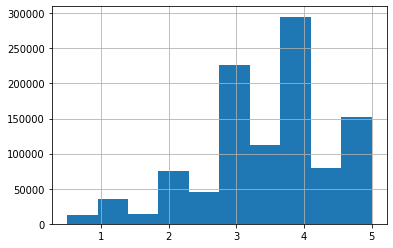

In [30]:
# Plot histogram for rating distribution
ratings['rating'].hist()
plt.show()

In [37]:
# Pivot ratings dataframe into a matrix form
# Use userId as rows and movieId as columns
# Fill NaN with zero
ratings_matrix = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SVD Matrix Factorization

##### We will use `scipy` library to implement SVD

In [38]:
# Prepare demeaned matrix for SVD
R = ratings_matrix.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Load scipy library
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

# Convert sigma to a diagonal matrix form for SVD
sigma = np.diag(sigma)

# Multiply U, S and Vt, add back the overall mean
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

# Turn the dot product into a dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

# View the dataframe
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,129350,129354,129428,129707,130052,130073,130219,130462,130490,130642
0,0.540995,0.843632,0.175701,-0.011760,-0.181734,0.135975,-0.459275,-0.023876,-0.207347,-0.016000,...,0.006033,-0.008744,-0.000960,-0.002264,-0.003274,0.001616,-0.008724,-0.010165,0.001714,-0.004818
1,1.126602,0.074863,0.333645,0.084757,0.208162,0.154196,0.434022,0.002525,0.108228,-0.105898,...,-0.003558,-0.007010,-0.003883,-0.001358,-0.001390,0.003223,-0.004999,0.001781,0.007028,-0.000433
2,1.937884,0.908821,-0.061293,-0.022979,-0.041665,0.473491,0.025520,0.010201,-0.037875,0.242482,...,0.002940,0.011799,0.006577,0.004205,0.002523,0.025215,-0.002750,0.006520,0.006823,-0.000506
3,-0.522958,0.675686,0.390795,0.005326,0.252884,0.825424,0.063328,0.083529,0.206329,0.968592,...,0.002022,0.001737,0.002378,0.002758,0.001924,0.000865,0.001771,0.001563,0.004668,0.000457
4,2.145759,1.071243,1.257973,0.103505,1.185075,0.597056,1.349056,0.173922,0.300962,1.364036,...,-0.001485,0.010323,-0.009227,0.001540,0.001488,0.001313,0.000757,0.001082,0.006296,0.002579


## Recommendations

##### Now we will define a function that uses our factorized matrices to recommend movies to a user, given a `userId`.

In [47]:
# Define the movie recommendation function
def recommend_movies(preds_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1

    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])]).merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'movieId',
               right_on = 'movieId').rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1]
                      
    return user_full, recommendations

# Test user 20 for all the movies rated by this user, as well as movies recommended for this individual
user_rated, predictions = recommend_movies(preds_df, 20, movies, ratings, 10)

user_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
11,20,1884,5.0,1126539710,Fear and Loathing in Las Vegas (1998),Adventure|Comedy|Drama
2,20,111,4.5,1126539863,Taxi Driver (1976),Crime|Drama|Thriller
8,20,1208,4.5,1126539560,Apocalypse Now (1979),Action|Drama|War
0,20,16,4.0,1126539588,Casino (1995),Crime|Drama
9,20,1221,4.0,1126539506,"Godfather: Part II, The (1974)",Crime|Drama
20,20,2710,4.0,1126539586,"Blair Witch Project, The (1999)",Drama|Horror|Thriller
19,20,2571,4.0,1126539826,"Matrix, The (1999)",Action|Sci-Fi|Thriller
16,20,2023,4.0,1126539808,"Godfather: Part III, The (1990)",Crime|Drama|Mystery|Thriller
10,20,1291,4.0,1126539851,Indiana Jones and the Last Crusade (1989),Action|Adventure
14,20,1994,4.0,1126539924,Poltergeist (1982),Horror|Thriller


In [48]:
# Movie Recommendations for user 20
predictions

,movieId,title,genres
836,858,"Godfather, The (1972)",Crime|Drama
4871,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
7013,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
1105,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
1178,1213,Goodfellas (1990),Crime|Drama
2609,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
1172,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
2852,2959,Fight Club (1999),Action|Crime|Drama|Thriller
1161,1193,One Flew Over the Cuckoo's Nest (1975),Drama
1661,1732,"Big Lebowski, The (1998)",Comedy|Crime


source: Recommender Systems with Python — Part III: Collaborative Filtering (Singular Value Decomposition) https://heartbeat.fritz.ai/recommender-systems-with-python-part-iii-collaborative-filtering-singular-value-decomposition-5b5dcb3f242b